Compare the vector of the 2 sentences 

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import transformers
import numpy as np

In [ ]:
path_data_tortured = '/content/yes_concat.txt'
data_tortured = pd.read_csv(path_data_tortured, sep='\t', header=None)
data_tortured.columns = ['status','index_id','para','tortured_phrases','expected_phrases']
data_tortured

status  index_id                                               para  \
0       yes      2198   . Triple Bottom Line TBL Triple Bottom Line i...   
1       yes      1747   This document discusses yet another aspect; G...   
2       yes      1867   In most runs an intial population was chosen ...   
3       yes      2499   The particular proposed RAN is definitely an ...   
4       yes      5244   A further check of the redshift evaluation pr...   
...     ...       ...                                                ...   
1698    yes    101623   Flight Unlimited was simply the main distribu...   
1699    yes    102109  Starting at , the Larrys Creek watershed is . ...   
1700    yes    102247  In uncommon cases, beagles may create safe int...   
1701    yes    102272  Matter is made out of such things as particles...   
1702    yes    102418  A portion of the chemicals appearing most asto...   

                   tortured_phrases  \
0              vitality utilization   
1              hereditary algorithm   
2              hereditary algorithm   
3       convolutional neural system   
4                      blunder rate   
...                             ...   
1698  computational liquid elements   
1699         corrosive mine seepage   
1700         invulnerable framework   
1701                 motor vitality   
1702                   blunder rate   

                                     expected_phrases  
0                                          energy use  
1     genetic algorithm (beware FP 10.1109/78.485931)  
2     genetic algorithm (beware FP 10.1109/78.485931)  
3                  convolutional neural network (CNN)  
4                                          error rate  
...                                               ...  
1698                     computational fluid dynamics  
1699                             acidic mine drainage  
1700                                    immune system  
1701                                   kinetic energy  
1702                                       error rate  

[1703 rows x 5 columns]

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-distilroberta-v1')

In [ ]:
# embed the sentence vector to the data with tortured phrases
sentence_embeddings_tortured = model.encode(data_tortured['para'])

In [ ]:
# new_text = data_tortured['para'][0].replace(data_tortured['tortured_phrases'][0], data_tortured['expected_phrases'][0])
# new_para=data_tortured['para'].copy()
def replace_phrases(para,tortured, expected):
  return para.replace(tortured, expected)

replace_phrases(data_tortured['para'][4],data_tortured['tortured_phrases'][4], data_tortured['expected_phrases'][4])

' A further check of the redshift evaluation procedure was carried out by comparing the sample with overlap galaxy redshifts taken out from the NED. Out of this archive we discovered literature redshifts that overlapped with the Aquarius survey area. No redshifts had been available for the Cetus region. Fig. bottom panel displays the velocity differences with this comparison. For these information we initially discovered an rms mistake of km s. However , upon identifying and eliminating a single observation that km t, we found which the rms dropped in order to km h. For this NED universe, we traced the particular redshift measurement towards the work of, who else reported that the calculate for this object had not been safe and has been rejected from their evaluation. This leads all of us to conclude that our general error rate meant for measuring redshifts is usually low.'

In [ ]:
# replace the expected phrases to the tortured phrases
replaced_para = [replace_phrases(para,tortured, expected) for para,tortured,expected in zip(data_tortured['para'],data_tortured['tortured_phrases'],data_tortured['expected_phrases'])]
replaced_para

[' . Triple Bottom Line TBL Triple Bottom Line is just an throughout the board display that has been connected within the comprehension of social obligations amongst organizations that are searching forward for that consolidation of non financial qualities within their organizations. Its idea has occurred to much design in the plank, contributing and the board in the course of the most up to date couple of years. It has been clarified that a defined accomplishment of organizations should be approximated not simply by the utilization of conventional cash related bottom line, however require furthermore to be estimated by on the meaning and ecological elements. Indeed, many people have acknowledged that, associations possess a great deal of obligations to their partners to get mindful practices. What s more, it is furthermore obvious that, it isn t workable meant for firms over the long haul to be effective in the event they ignore key partners passions. Its clear oddity lines within the

In [ ]:
sentence_embedding_new_para = model.encode(replaced_para)

In [ ]:
# each embedding is one demension with 768 elements
sentence_embedding_new_para[1].shape

(768,)

In [ ]:
from numpy.linalg import norm
from statistics import mean
import numpy as np

# compute norm of each sentences L1 norm
list_norm_expected = []
list_norm_tortured = []

for sentence_tortured, sentence_expected in zip(sentence_embeddings_tortured,sentence_embedding_new_para):
  list_norm_expected.append(norm(sentence_expected,1))
  list_norm_tortured.append(norm(sentence_tortured,1))

print(np.average(np.array(list_norm_expected)),np.average(np.array(list_norm_tortured)))

21.872242 21.864384


In [ ]:
# list_norm_expected

In [ ]:
path_data_origin = '/content/no_original_concat.txt'
path_data_tortured = '/content/yes_concat.txt'
data_origin = pd.read_csv(path_data_origin, sep='\t', header=None)
data_origin.columns = ['status','none','para']
data_origin

status  none                                               para
0        no   NaN   The coordination index of an agglomerate is c...
1        no   NaN   Though the inference of personal traits enabl...
2        no   NaN   using the natural invariant density. Equation...
3        no   NaN   In the condensation region , so that the main...
4        no   NaN   To summarize briefly in BaFe PO it was necess...
...     ...   ...                                                ...
1663     no   NaN  Proposed measures, evaluating implementation o...
1664     no   NaN  According to Varoudakis and Zenegnaw there exi...
1665     no   NaN  Researchers in beverage field in cooperation w...
1666     no   NaN  New forms of launching products may significan...
1667     no   NaN   The International Organization for Standardiz...

[1668 rows x 3 columns]

In [ ]:
sentence_embedding_original = model.encode(data_origin['para'])

*tortured* Vs original

In [ ]:
from numpy.linalg import norm
from statistics import mean
import numpy as np

# compute norm of each sentences L1 norm
list_norm_original = []
list_norm_tortured = []

for sentence_tortured, sentence_origin in zip(sentence_embeddings_tortured,sentence_embedding_original):
  list_norm_original.append(norm(sentence_origin,1))
  list_norm_tortured.append(norm(sentence_tortured,1))

print(f'avg original: {np.average(np.array(list_norm_original))}\n avg tortured: {np.average(np.array(list_norm_tortured))}')

avg original: 21.900489807128906
 avg tortured: 21.86437225341797


In [ ]:
list_norm_original

In [ ]:
np.var(list_norm_original)

0.056455232

In [ ]:
np.var(list_norm_tortured)

0.061051767

## Compare the difference of tortured and expected phrases

In [ ]:
path_phrases = '/content/torturedPhrasesCleanNoAnd.csv'
data = pd.read_csv(path_phrases, sep=';')
data = data[['torturedPhrases','expectedPhrases']]
data

torturedPhrases              expectedPhrases
0    profound neural organization          deep neural network
1                     fake neural  artificial neural (network)
2              counterfeit neural  artificial neural (network)
3             organization ambush               network attack
4            organization assault               network attack
..                            ...                          ...
540        insatiable calculation             greedy algorithm
541         voracious calculation             greedy algorithm
542            ravenous algorithm             greedy algorithm
543          insatiable algorithm             greedy algorithm
544           voracious algorithm             greedy algorithm

[545 rows x 2 columns]

In [ ]:
import re
# function to remove word in bracket
def rm_word_bracket(text):
    return re.sub("[\(\[].*?[\)\]]","", text)
data["expectedPhrases"]= data['expectedPhrases'].apply(rm_word_bracket)
data

torturedPhrases      expectedPhrases
0    profound neural organization  deep neural network
1                     fake neural   artificial neural 
2              counterfeit neural   artificial neural 
3             organization ambush       network attack
4            organization assault       network attack
..                            ...                  ...
540        insatiable calculation     greedy algorithm
541         voracious calculation     greedy algorithm
542            ravenous algorithm     greedy algorithm
543          insatiable algorithm     greedy algorithm
544           voracious algorithm     greedy algorithm

[545 rows x 2 columns]

{'input_ids': [101, 2784, 15756, 2897, 102], 'attention_mask': [1, 1, 1, 1, 1]}
['[CLS]', 'deep', 'neural', 'network', '[SEP]'] 

[CLS] deep neural network [SEP] 

---------------- 

{'input_ids': [101, 7976, 15756, 102], 'attention_mask': [1, 1, 1, 1]}
['[CLS]', 'artificial', 'neural', '[SEP]'] 

[CLS] artificial neural [SEP] 

---------------- 

{'input_ids': [101, 7976, 15756, 102], 'attention_mask': [1, 1, 1, 1]}
['[CLS]', 'artificial', 'neural', '[SEP]'] 

[CLS] artificial neural [SEP] 

---------------- 

{'input_ids': [101, 2897, 2886, 102], 'attention_mask': [1, 1, 1, 1]}
['[CLS]', 'network', 'attack', '[SEP]'] 

[CLS] network attack [SEP] 

---------------- 

{'input_ids': [101, 2897, 2886, 102], 'attention_mask': [1, 1, 1, 1]}
['[CLS]', 'network', 'attack', '[SEP]'] 

[CLS] network attack [SEP] 

---------------- 



Graph for vector comparison 

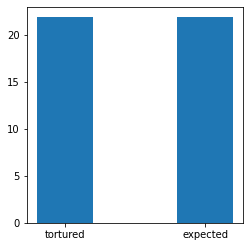

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0,0,1,1])
langs = ['tortured', 'expected']
students = [21.8643,21.8722]
ax.bar(langs,students, width = 0.4)
plt.show()

# check bar gap and big scale to see the deeper different